
### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Analyst: Somayeh Davodi
***Last updated: October 2023***


## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Part1: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
print(reviews.shape)
print(reviews.dtypes)

(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Descriptive statistics.
round(reviews.describe(), 2)

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,39.49,48.08,50.00,1578.03,4320.52
std,13.57,23.12,26.09,1283.24,3148.94
min,17.00,12.30,1.00,25.00,107.00
25%,29.00,30.34,32.00,772.00,1589.25
50%,38.00,47.15,50.00,1276.00,3624.00
75%,49.00,63.96,73.00,1751.25,6654.00
max,72.00,112.34,99.00,6847.00,11086.00


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews.drop(['language', 'platform'], axis=1, inplace=True)

# View column names.
print(reviews.columns)
print(reviews.shape)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')
(2000, 9)


## 3. Rename columns

In [8]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)':'remuneration' ,'spending_score (1-100)': 'spending_score'},
               inplace=True)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
reviews_df = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
reviews_df

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

In [11]:
# Independent variable.
X = reviews_df['spending_score']

# Dependent variable.
y = reviews_df['loyalty_points']

# OLS model and summary.
ols_model = sm.OLS(y, sm.add_constant(X))
results = ols_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        14:58:47   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [12]:
# Extract the estimated parameters.
print(f"Regression line parameters are:\n{(round(results.params,2))}")

# Extract the standard errors.
print("-----------------------------------------") # Insert a dashed line. 
print(f"Standard errors:\n{round(results.bse,3)}") 

# Extract the predicted values.
y_pred = results.predict(sm.add_constant(X))
print("-----------------------------------------")
print(f"Predicted values are:\n{y_pred.round(1)}")

Regression line parameters are:
const            -75.05
spending_score    33.06
dtype: float64
-----------------------------------------
Standard errors:
const             45.931
spending_score     0.814
dtype: float64
-----------------------------------------
Predicted values are:
0       1214.4
1       2602.9
2        123.3
3       2470.7
4       1247.4
         ...  
1995    2206.2
1996     189.4
1997    2933.6
1998     453.9
1999     189.4
Length: 2000, dtype: float64


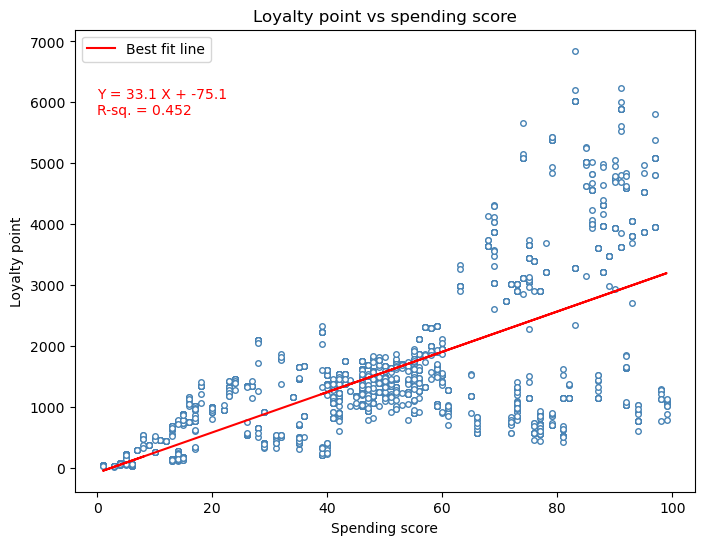

In [13]:
# Plot the graph with a regression line.
plt.figure(figsize=(8,6))
plt.scatter(X, y, s=16, marker = 'o', edgecolor='steelblue', facecolor='white')
plt.plot(X, y_pred, color='red', label='Best fit line')
plt.title('Loyalty point vs spending score')
plt.xlabel('Spending score')
plt.ylabel('Loyalty point')
plt.text(0,5800, f"Y = {round(results.params[1],1)} X + {round(results.params[0],1)} \nR-sq. = {round(results.rsquared, 3)}",
         color='red')
plt.grid(False)
plt.legend()
plt.show()

### 5b) renumeration vs loyalty

In [14]:
# Independent variable.
X = reviews_df['remuneration']

# Dependent variable.
y = reviews_df['loyalty_points']

# OLS model and summary.
ols_model = sm.OLS(y, sm.add_constant(X))
results = ols_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        14:58:47   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

In [15]:
# Extract the estimated parameters.
print(f"Regression line parameters are:\n{(round(results.params,2))}")

# Extract the standard errors.
print("-----------------------------------------") # Insert a dashed line. 
print(f"Standard errors:\n{round(results.bse,3)}") 

# Extract the predicted values.
y_pred = results.predict(sm.add_constant(X))
print("-----------------------------------------")
print(f"Predicted values are:\n{y_pred.round(1)}")


Regression line parameters are:
const          -65.69
remuneration    34.19
dtype: float64
-----------------------------------------
Standard errors:
const           52.171
remuneration     0.978
dtype: float64
-----------------------------------------
Predicted values are:
0        354.8
1        354.8
2        382.9
3        382.9
4        410.9
         ...  
1995    2821.8
1996    3102.2
1997    3102.2
1998    3298.4
1999    3102.2
Length: 2000, dtype: float64


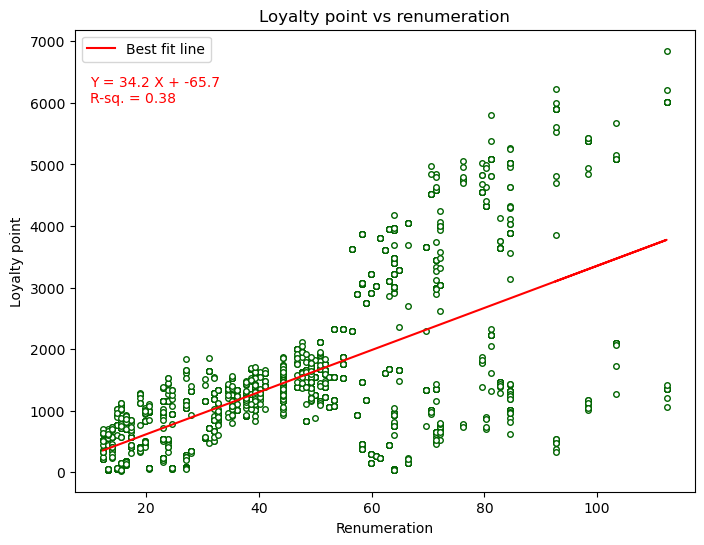

In [16]:
# Plot the graph with a regression line.
plt.figure(figsize=(8,6))
plt.scatter(X, y, s=16, marker = 'o', edgecolor='darkgreen', facecolor='white')
plt.plot(X, y_pred, color='red', label='Best fit line')
plt.title('Loyalty point vs renumeration')
plt.xlabel('Renumeration')
plt.ylabel('Loyalty point')
plt.text(10,6000, f"Y = {round(results.params[1],1)} X + {round(results.params[0],1)}\nR-sq. = {round(results.rsquared, 3)}",
         color='red')
plt.grid(False)
plt.legend()
plt.show()

### 5c) age vs loyalty

In [17]:
# Independent variable.
X = reviews_df['age']

# Dependent variable.
y = reviews_df['loyalty_points']

# OLS model and summary.
ols_model = sm.OLS(y, sm.add_constant(X))
results = ols_model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 09 Oct 2023   Prob (F-statistic):             0.0577
Time:                        14:58:47   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [18]:
# Extract the estimated parameters.
print(f"Regression line parameters are:\n{(round(results.params,2))}")

# Extract the standard errors.
print("-----------------------------------------") # Insert a dashed line. 
print(f"Standard errors:\n{round(results.bse,3)}") 

# Extract the predicted values.
y_pred = results.predict(sm.add_constant(X))
print("-----------------------------------------")
print(f"Predicted values are:\n{y_pred.round(1)}")

Regression line parameters are:
const    1736.52
age        -4.01
dtype: float64
-----------------------------------------
Standard errors:
const    88.249
age       2.113
dtype: float64
-----------------------------------------
Predicted values are:
0       1664.3
1       1644.2
2       1648.2
3       1636.2
4       1604.1
         ...  
1995    1588.0
1996    1564.0
1997    1600.1
1998    1600.1
1999    1608.1
Length: 2000, dtype: float64


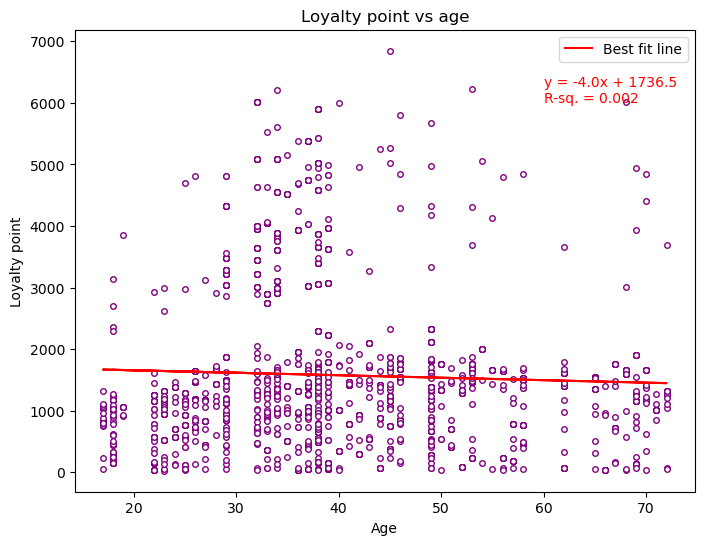

In [19]:
# Plot the graph with a regression line.
plt.figure(figsize=(8,6))
plt.scatter(X, y, s=16, marker = 'o', edgecolor='purple', facecolor='white')
plt.plot(X, y_pred, color='red', label='Best fit line')
plt.title('Loyalty point vs age')
plt.xlabel('Age')
plt.ylabel('Loyalty point')
plt.text(60, 6000, f"y = {round(results.params[1],1)}x + {round(results.params[0],1)}\nR-sq. = {round(results.rsquared, 3)}",
         color='red')
plt.grid(False)
plt.legend()
plt.show()


## Part 1: Observations and insights

***Observation:*** 

Both tools revealed that there is a moderate positive correlation was detected between loyalty-Spending score (R-sq = 0.45) and loyalty-Renumeration (0.38) but no correlation between loyalty point and age (R-sq = 0.002).


***Recommendation to marketing team:*** 

•	Reward Program Focus: Concentrate loyalty rewards on customers with higher spending scores and remunerations due to their stronger loyalty correlation.

•	Targeted Marketing: Design personalised marketing for these high-value customer segments to drive loyalty and repeat business.

•	Age Consideration: While age shows a weak correlation with loyalty, explore other age-related factors that may influence loyalty, such as generational preferences and adapt strategies accordingly.

•	Continuous Adaptation: Monitor loyalty program impact and customer behavior, adjusting strategies as needed. 

These shorter recommendations emphasize targeting high-value customers, considering age factors, and adapting strategies based on customer behaviours and loyalty trends.


# 

# Part 2: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.


## 1. Load and explore the data

In [20]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [22]:
# Drop unnecessary columns.
df2 = df2[['spending_score', 'remuneration']]

# View DataFrame.
df2

,spending_score,remuneration
0,39,12.30
1,81,12.30
2,6,13.12
3,77,13.12
4,40,13.94
...,...,...
1995,69,84.46
1996,8,92.66
1997,91,92.66
1998,16,98.40


In [23]:
# Explore the data.
print(df2.shape)
df2.info()

(2000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   spending_score  2000 non-null   int64  
 1   remuneration    2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [24]:
# Descriptive statistics.
df2.describe()

,spending_score,remuneration
count,2000.000000,2000.000000
mean,50.000000,48.079060
std,26.094702,23.123984
min,1.000000,12.300000
25%,32.000000,30.340000
50%,50.000000,47.150000
75%,73.000000,63.960000
max,99.000000,112.340000


## 2. Plot

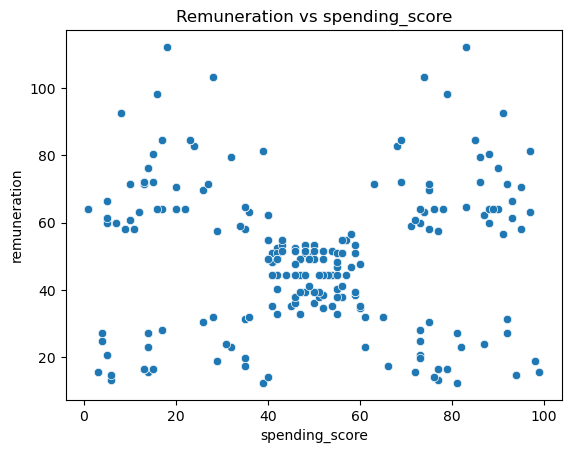

In [25]:
# Create a scatterplot with Seaborn.
sns.scatterplot(df2, x='spending_score', y='remuneration')
# Define a dictionary with style parameters
style_parameters = {
    'font.family': 'serif',  # Set the font family for text
    'axes.labelsize': 14,    # Set the label font size for axes
    'axes.titlesize': 16,    # Set the title font size for axes
    'axes.grid': True,       # Show gridlines in the plot
    'lines.linewidth': 2.5,  # Set the line width for plot lines
}
sns.set_style(rc=style_parameters)
plt.title('Remuneration vs spending_score')
plt.show()

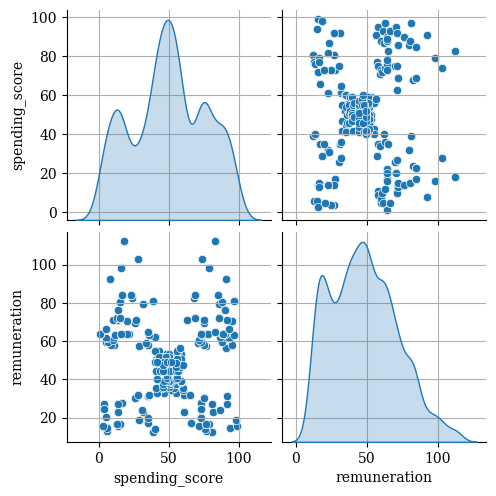

In [26]:
# Create a pairplot with Seaborn.
sns.pairplot(df2, diag_kind='kde' )
plt.show()

## 3. Elbow and silhoutte methods

In [27]:
# Determine the number of clusters: Elbow method.
X = df2[['spending_score', 'remuneration']]
ss = [] #Create an empty list for sum of squares.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,  
                   init='k-means++', 
                   max_iter=300,
                    n_init=100,
                   random_state=42) # Create the KMeans clustring model based on iteration over k values.
    kmeans.fit(X) # Fit the independent feature.
    ss.append(kmeans.inertia_) 

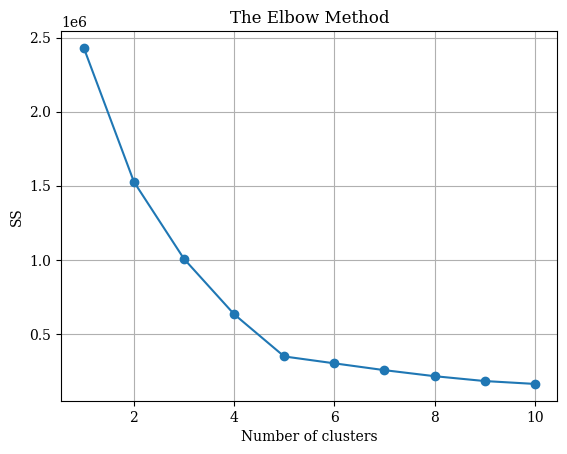

In [28]:
# Plot the elbow.
plt.plot(range(1,11), ss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

In [29]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10
for k in range(2, kmax + 1):
    kmeans_s = KMeans(n_clusters = k).fit(X)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(X,
    labels=kmeans_s.labels_,
    metric='euclidean'))
# View silhouette method outputs.
sil

[0.3206366227498789,
 0.4565233708135332,
 0.5121777811173631,
 0.583495329782684,
 0.5626776462607388,
 0.5428100635523179,
 0.5224735655473511,
 0.4686616009997384,
 0.4582761379138458]

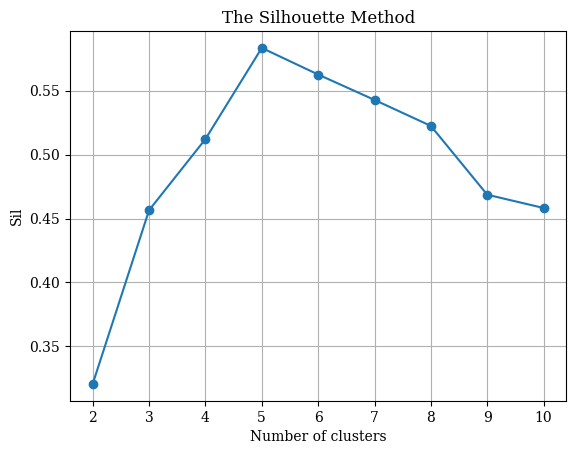

In [30]:
# Plot Silhouette method.
plt.plot(range(2, kmax+1), sil, marker = 'o')
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()


## 4. Evaluate k-means model at different values of *k*

Let's test for three clusters.

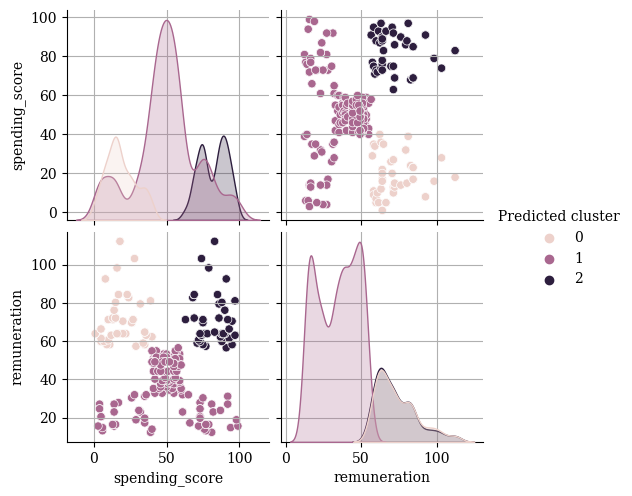

In [31]:
# Building the kmeans model for k = 3.
km_model = KMeans(n_clusters=3,
                 init='k-means++', 
                 max_iter=300,
                 n_init=100,
                 random_state=42).fit(X)
clusters = km_model.labels_
X['Predicted cluster'] = clusters

# Plot the results to visualise the clusters.b
sns.pairplot(X, 
             hue='Predicted cluster', 
             diag_kind='kde')
plt.show()

In [32]:
# Check number of observation per each cluster.
X['Predicted cluster'].value_counts()

1    1293
2     356
0     351
Name: Predicted cluster, dtype: int64

Let's test for four clusters.

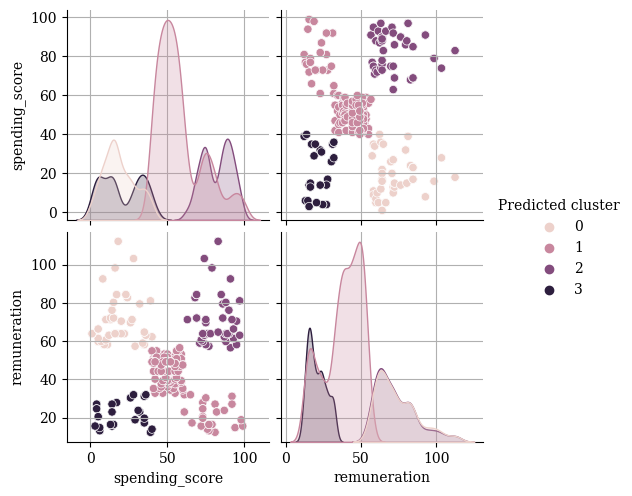

In [33]:
# Building the kmeans model for k = 4.
km_model = KMeans(n_clusters=4,
                 init='k-means++', 
                 max_iter=300,
                 n_init=100,
                 random_state=42).fit(X)
clusters = km_model.labels_
X['Predicted cluster'] = clusters

# Plot the results to visualise the clusters.
sns.pairplot(X, 
             hue='Predicted cluster', 
             diag_kind='kde')
plt.show()

In [34]:
# Check number of observation per each cluster.
X['Predicted cluster'].value_counts()

1    1013
2     356
0     351
3     280
Name: Predicted cluster, dtype: int64

Let's test for five clusters.

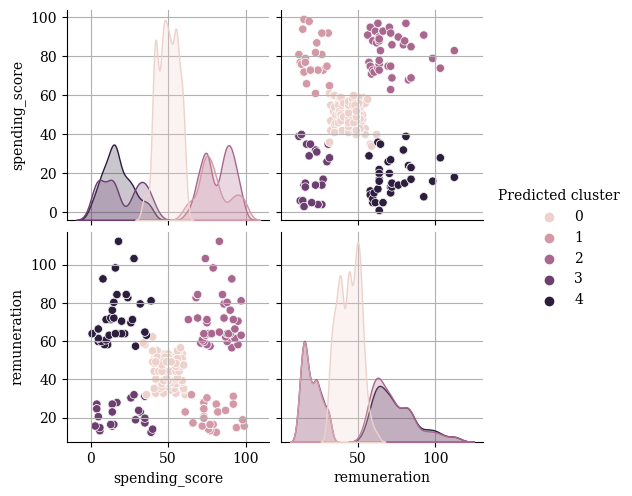

In [35]:
# Building the kmeans model for k = 5.
km_model = KMeans(n_clusters=5,
                 init='k-means++', 
                 max_iter=300,
                 n_init=100,
                 random_state=42).fit(X)
clusters = km_model.labels_
X['Predicted cluster'] = clusters

# Plot the results to visualise the clusters.
sns.pairplot(X, 
             hue='Predicted cluster', 
             diag_kind='kde')
plt.show()

In [36]:
# Check number of observation per each cluster.
X['Predicted cluster'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: Predicted cluster, dtype: int64

<!-- Lets test for five clusters. -->

## 5. Fit final model and justify your choice

In [37]:
# Apply the final model.
km_model = KMeans(n_clusters=5,
                 init='k-means++', 
                 max_iter=300,
                 n_init=100,
                 random_state=42).fit(X)
clusters = km_model.labels_
X['Predicted cluster'] = clusters

In [38]:
# Check the number of observations per predicted class.
X['Predicted cluster'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: Predicted cluster, dtype: int64

## 6. Plot and interpret the clusters

In [39]:
df2


,spending_score,remuneration
0,39,12.30
1,81,12.30
2,6,13.12
3,77,13.12
4,40,13.94
...,...,...
1995,69,84.46
1996,8,92.66
1997,91,92.66
1998,16,98.40


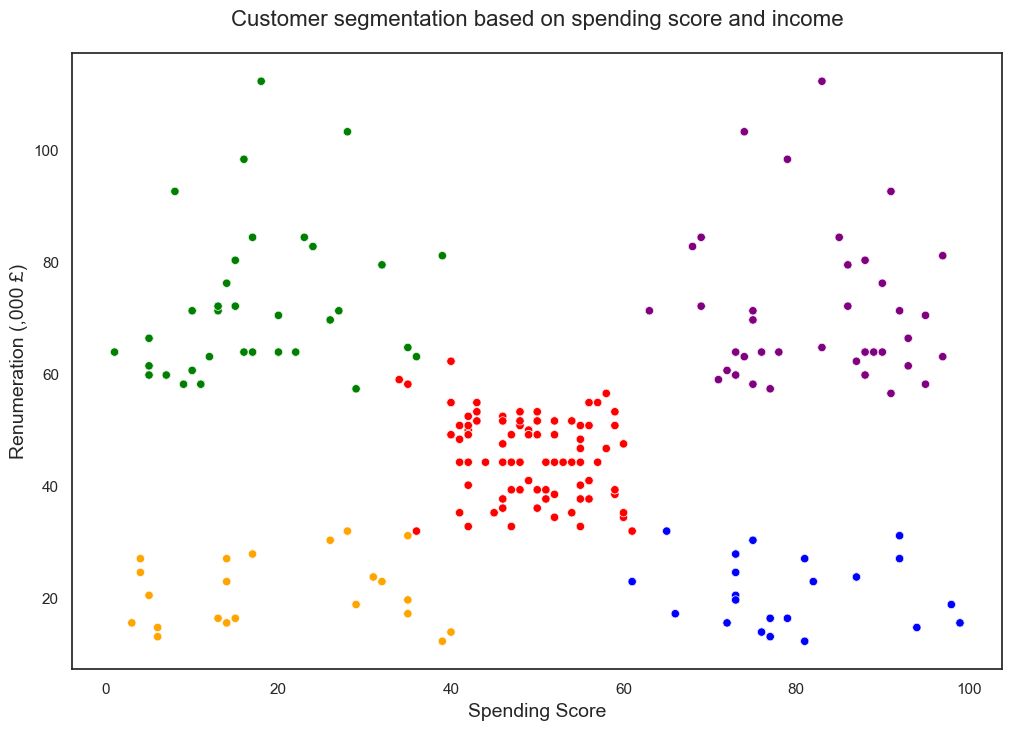

,spending_score,remuneration
0,39,12.30
1,81,12.30
2,6,13.12
3,77,13.12
4,40,13.94


In [40]:
# Visualising the clusters.
sns.set(rc={'figure.figsize':(12, 8)}, style = 'white')

sns.scatterplot(X, 
                x='spending_score', 
                y='remuneration', 
                hue='Predicted cluster', 
                palette=['red', 'blue', 'purple', 'orange', 'green'])
plt.title('Customer segmentation based on spending score and income', size=16, pad=20)
plt.xlabel('Spending Score', size=14)
plt.ylabel('Renumeration (,000 £)', size=14)
plt.legend().remove()
plt.show()
# View the DataFrame.
df2.head()

In [41]:
# Check the number of observations per predicted class.
X['Predicted cluster'].value_counts()


0    774
2    356
4    330
3    271
1    269
Name: Predicted cluster, dtype: int64

## Part 2 : Insights and observations

***Observation:***  
Based on the results, we determined that using five clusters was the best approach for the final prediction model.
Based on these recognised clusters, marketing team can: 


***Recommendation to marketing team:*** 

•	Targeted Marketing: Customise marketing campaigns for each cluster to align with their preferences and behaviours.    

•	Product Recommendation: Suggest products that resonate with each cluster's interests and needs.

•	Pricing Strategies: Adjust prices based on the price sensitivity of each cluster.

•	Communication Channels: Use preferred communication channels for each cluster to maximize engagement.

# 

# Part 3: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.



## 1. Load and explore the data

In [42]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt


# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
# !pip install textblob
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
df3

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [44]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [45]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review', 'summary']]

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [46]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [47]:
# Review: Change all to lower case and join with a space.
df3['review'] = ["".join(rev.lower()) for rev in df3['review']]
df3['review'][0:3]

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*:\n\nyour unpaint...
2    nice art, nice printing.  why two panels are f...
Name: review, dtype: object

In [48]:
# Review: Change all to lower case and join with a space.
# Joined all reviews as one paragraph.
reviews = " ".join(df3['review'].str.lower())
reviews

'when it comes to a dm\'s screen, the space on the screen itself is at an absolute premium. the fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. the only reason that i gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. other than that, it drops the ball completely. an open letter to galeforce9*:\n\nyour unpainted miniatures are very not bad. your spell cards are great. your board games are "meh". your dm screens, however, are freaking terrible. i\'m still waiting for a single screen that isn\'t polluted with pointless artwork where useful, reference-able tables should be. once again, you\'ve created a single use screen that is only useful when running the "storm king\'s thunder" adventure. even despite the fact that it\'s geared to that adventure path, it\'s usefulness negligible, at best. i massive swath of the inner panel is wasted on

In [49]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = ["".join(summ.lower()) for summ in df3['summary']]
df3['summary'][0:4]

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
Name: summary, dtype: object

In [50]:
# Summary: Change all to lower case and join with a space.
# Joined all summaries as one paragraph.
summary = " ".join(df3["summary"].str.lower())
summary

'the fact that 50% of this space is wasted on art (and not terribly informative or needed art ... another worthless dungeon master\'s screen from galeforce9 pretty, but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity.  not a value add to the product line. five stars love the map! not a general dm screen very weak game fell completely flat... five stars good book buckley was a card mommer very advanced, but as good as it gets you better know what you\'re getting into don\'t bother the worst value i\'ve ever seen not enough product good product but... temporary tattoos were good gift. huge hit gorgeous pictures! five stars wonderful designs. wow, great coloring book!!!!!! nice book great pictures perfect! well done.... my relaxation beautiful coloring book the pictures are great, i\'ve done one and gave it to a ... great buy! can\'t wait to work on this book stained glass perfection! four stars 

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [51]:
# Replace all the punctuations in review column.
import re 
df3 ['review'] =[re.sub(r'[^\w\s]', ' ', rev) for rev in df3['review']]

# View output.
df3 ['review']

0       when it comes to a dm s screen  the space on t...
1       an open letter to galeforce9  \n\nyour unpaint...
2       nice art  nice printing   why two panels are f...
3       amazing buy  bought it as a gift for our new d...
4       as my review of gf9 s previous screens these w...
                              ...                        
1995    the perfect word game for mixed ages  with mom...
1996    great game   did not think i would like it whe...
1997    great game for all         \nkeeps the mind ni...
1998                                            fun game 
1999    this game is fun  a lot like scrabble without ...
Name: review, Length: 2000, dtype: object

In [52]:
# Replace all the puncuations in summary column.
df3['summary'] = [re.sub(r'[^\w\s]',' ', summ) for summ in df3['summary']]

# View output.
df3['summary']

0       the fact that 50  of this space is wasted on a...
1       another worthless dungeon master s screen from...
2                         pretty  but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995       the perfect word game for mixed ages  with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [53]:
# Let's first find out how many duplicates we have.
print("There are", len(df3[df3.duplicated()]), "number of duplicates in total as follow:")

# List of the duplicated values.
df3[df3.duplicated()].value_counts()

There are 27 number of duplicates in total as follow:


review                            summary   
love it                           five stars    6
great game                        five stars    4
great                             five stars    3
as expected                       five stars    2
good                              five stars    2
awesome                           five stars    1
good game                         five stars    1
good product                      five stars    1
great                             five stars    1
great expansion to a great game   five stars    1
great game                        five stars    1
love these                        five stars    1
nice                              five stars    1
ok                                five stars    1
on time and nice item             five stars    1
dtype: int64

In [54]:
# Drop duplicates in both columns.
df3.drop_duplicates(inplace=True)
df3 = df3.reset_index(drop=True)
# View DataFrame.
df3

,review,summary
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...
2,nice art nice printing why two panels are f...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new d...,five stars
4,as my review of gf9 s previous screens these w...,money trap
...,...,...
1968,the perfect word game for mixed ages with mom...,the perfect word game for mixed ages with mom
1969,great game did not think i would like it whe...,super fun
1970,great game for all \nkeeps the mind ni...,great game
1971,fun game,four stars


## 3. Tokenise and create wordclouds

In [55]:
# Create new DataFrame (copy DataFrame).
df4 = df3.copy()

# View DataFrame.
df4

,review,summary
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...
2,nice art nice printing why two panels are f...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new d...,five stars
4,as my review of gf9 s previous screens these w...,money trap
...,...,...
1968,the perfect word game for mixed ages with mom...,the perfect word game for mixed ages with mom
1969,great game did not think i would like it whe...,super fun
1970,great game for all \nkeeps the mind ni...,great game
1971,fun game,four stars


In [56]:
df4.iloc[0][1]

'the fact that 50  of this space is wasted on art  and not terribly informative or needed art    '

In [57]:
# Apply tokenisation to both columns.
df4["review_words"] = [word_tokenize(rev) for rev in df4["review"]]
df4["summary_words"] = [word_tokenize(summ) for summ in df4["summary"]]

# View DataFrame.
df4

,review,summary,review_words,summary_words
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...,"[when, it, comes, to, a, dm, s, screen, the, s...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, master, s, scree..."
2,nice art nice printing why two panels are f...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new d...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9 s previous screens these w...,money trap,"[as, my, review, of, gf9, s, previous, screens...","[money, trap]"
...,...,...,...,...
1968,the perfect word game for mixed ages with mom...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1969,great game did not think i would like it whe...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1970,great game for all \nkeeps the mind ni...,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1971,fun game,four stars,"[fun, game]","[four, stars]"


In [58]:
# First join all the reviews.
reviews = " ".join([" ".join(rev) for rev in df4['review_words']])
# reviews = str([" ".join(rev) for rev in reviews])
reviews

'when it comes to a dm s screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible i m still waiting for a single screen that isn t polluted with pointless artwork where useful reference able tables should be once again you ve created a single use screen that is only useful when running the storm king s thunder adventure even despite the fact that it s geared to that adventure path it s usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map whic

In [59]:
# Review: Create a word cloud.
word_cloud_rev = WordCloud(width=800, height=600, background_color='white',
                           max_words=100).generate(" ".join(df4['review']))


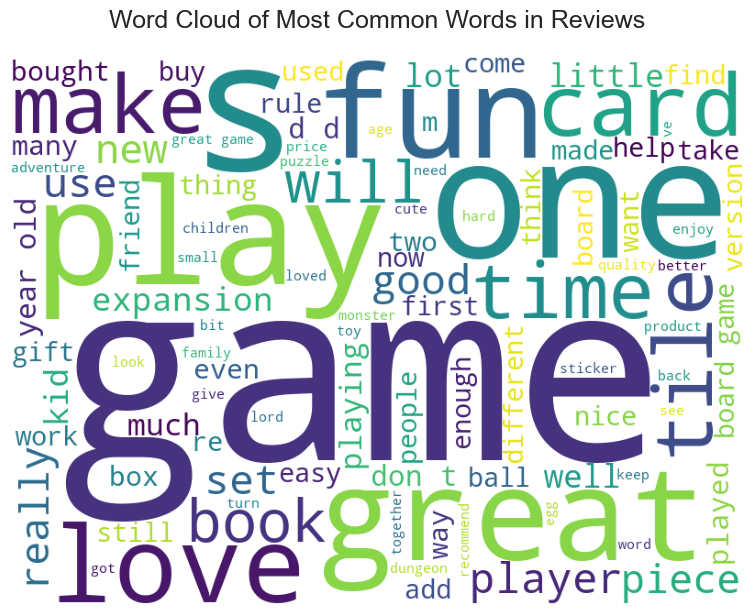

In [60]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud_rev)
plt.axis("off")
plt.tight_layout(pad=2)
plt.title("Word Cloud of Most Common Words in Reviews", pad=20, fontsize=18)
plt.show()

In [61]:
# Summary: Create a word cloud.
word_cloud_summ = WordCloud(width=800, height=600, background_color='white',
                            max_words=100).generate(" ".join(df4["summary"]))

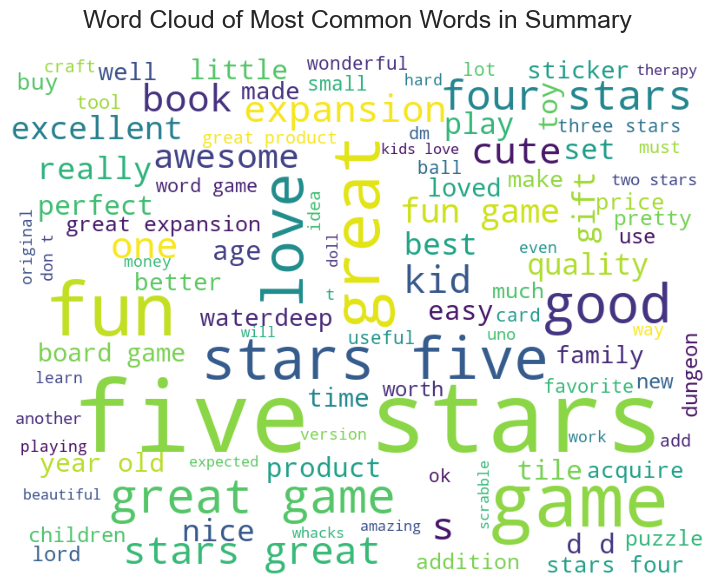

In [62]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(word_cloud_summ)
plt.tight_layout(pad=2)
plt.axis('off')
plt.title("Word Cloud of Most Common Words in Summary", pad=20, fontsize=18)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [63]:
# Determine the frequency distribution.
freq_dist_reviews = FreqDist(word_tokenize(reviews))
freq_dist_summary = FreqDist(word_tokenize(summary))

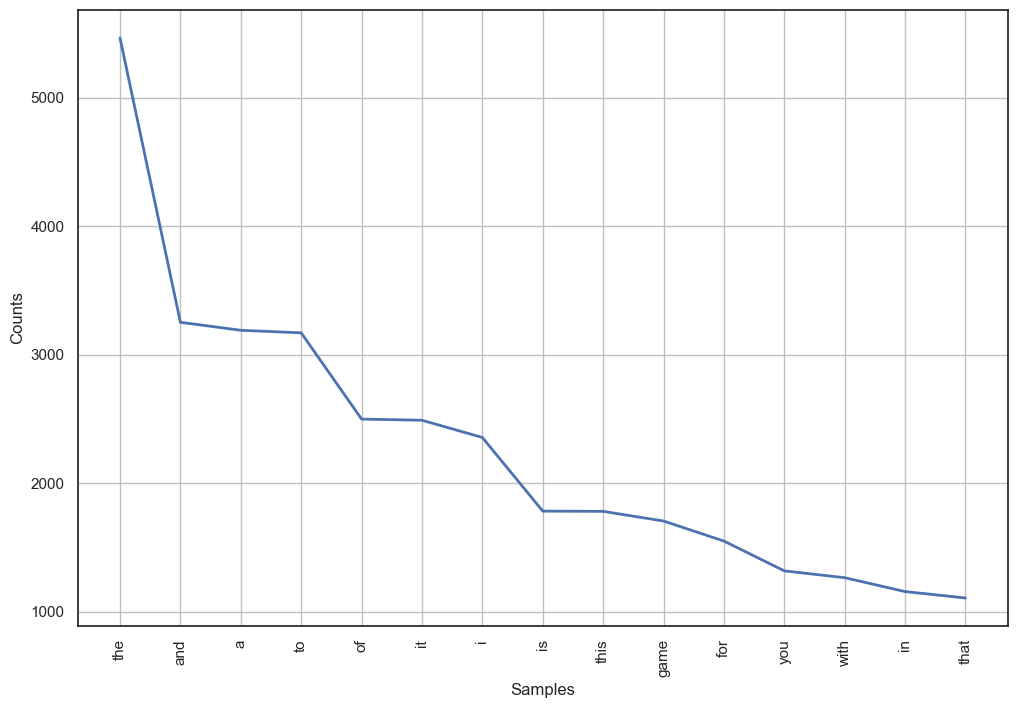

In [64]:
# Get the most 15 common words and their frequencies
freq_dist_reviews.plot(15, cumulative=False)
plt.show()

### 4b) Remove alphanumeric characters and stopwords

In [65]:
# Delete all the alphanum.
# Reviews:
reviews = [word for word in word_tokenize(reviews) if word.isalnum()]

# Summary:
summary = [word for word in word_tokenize(summary) if word.isalnum()]

In [66]:
# Remove all the stopwords 
# Recall stopwords first.
stopwords = set(nltk.corpus.stopwords.words("english"))

# Reviews:
reviews = [word for word in reviews if word not in stopwords]

# Summary: 
summary = [word for word in summary if word not in stopwords]

### 4c) Create wordcloud without stopwords

In [67]:
# Create a wordcloud without stop words.

# For reviews:
wordcloud_rev_nostopword = WordCloud(width=800, height=600, background_color='white', 
                                     max_words=80).generate(" ".join(reviews))

# For summary:
wordcloud_summ_nostopword = WordCloud(width=800, height=600, background_color='white',
                                      max_words=80).generate(" ".join(summary))

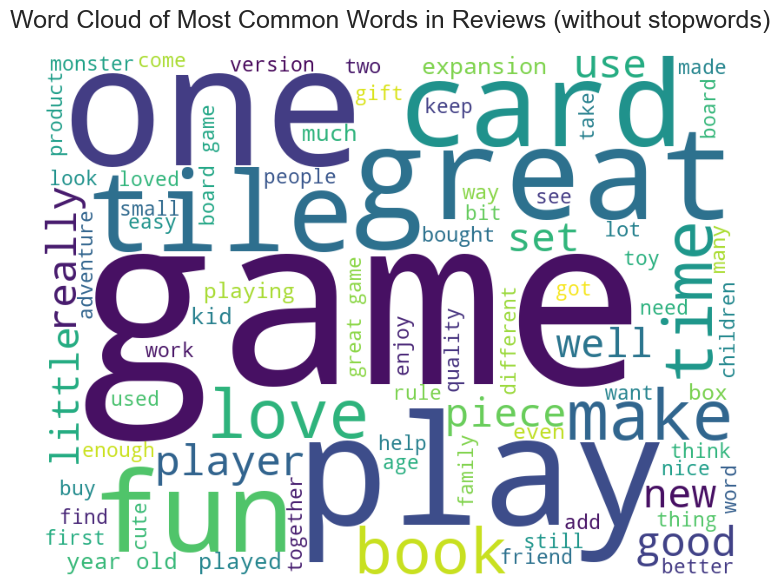

In [68]:
# Plot the wordcloud image.
# For reviews
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud_rev_nostopword)
plt.tight_layout(pad=2)
plt.axis('off')
plt.title("Word Cloud of Most Common Words in Reviews (without stopwords)", pad=20, fontsize=18)
plt.show()

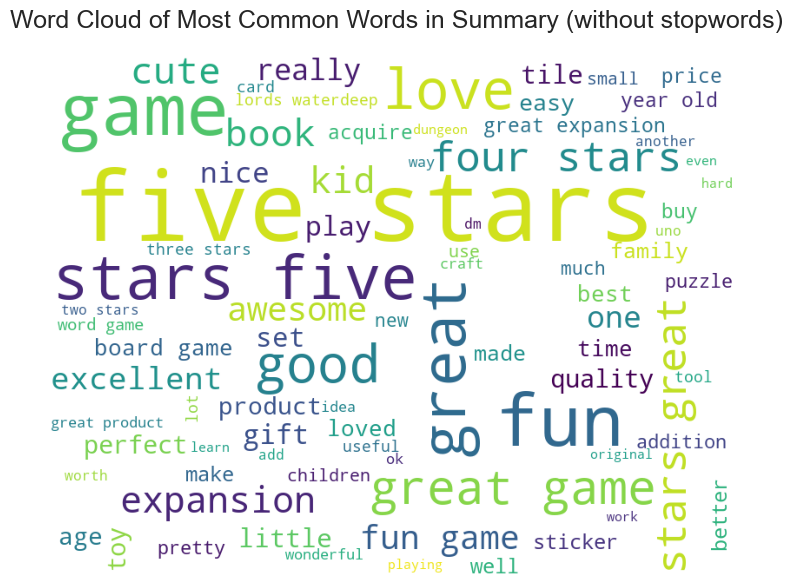

In [69]:
# Summary:
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud_summ_nostopword)
plt.tight_layout(pad=2)
plt.axis('off')
plt.title("Word Cloud of Most Common Words in Summary (without stopwords)", pad=20, fontsize=18)
plt.show()

### 4d) Identify 15 most common words and polarity

In [70]:
# Determine the 15 most common words.
# Determine the frequency distribution for reviews but without stopwords.
freq_dist_reviews = FreqDist(reviews) 

reviews_15_most_common_words = freq_dist_reviews.most_common(15)
reviews_15_most_common_words

[('game', 1706),
 ('great', 587),
 ('fun', 558),
 ('one', 540),
 ('play', 509),
 ('like', 421),
 ('love', 325),
 ('get', 320),
 ('really', 319),
 ('cards', 306),
 ('tiles', 300),
 ('time', 297),
 ('good', 292),
 ('would', 283),
 ('book', 278)]

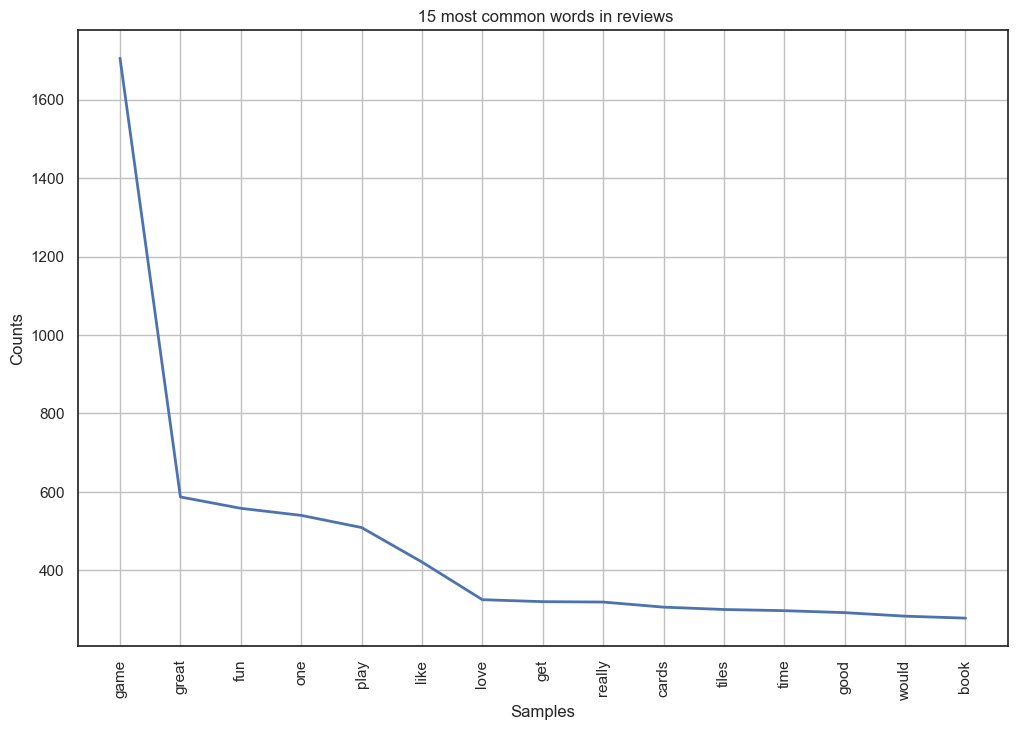

In [71]:
freq_dist_reviews.plot(15, title = ' 15 most common words in reviews', cumulative=False)
plt.show()

In [72]:
# Determine the 15 most common words.
# Determine the frequency distribution again for reviews without stopwords.
freq_dist_summary = FreqDist(summary)

summary_15_most_common_words = freq_dist_summary.most_common(15)
summary_15_most_common_words

[('stars', 466),
 ('five', 381),
 ('game', 318),
 ('great', 294),
 ('fun', 217),
 ('love', 93),
 ('good', 92),
 ('four', 58),
 ('like', 54),
 ('expansion', 52),
 ('kids', 50),
 ('cute', 45),
 ('book', 43),
 ('one', 39),
 ('awesome', 36)]

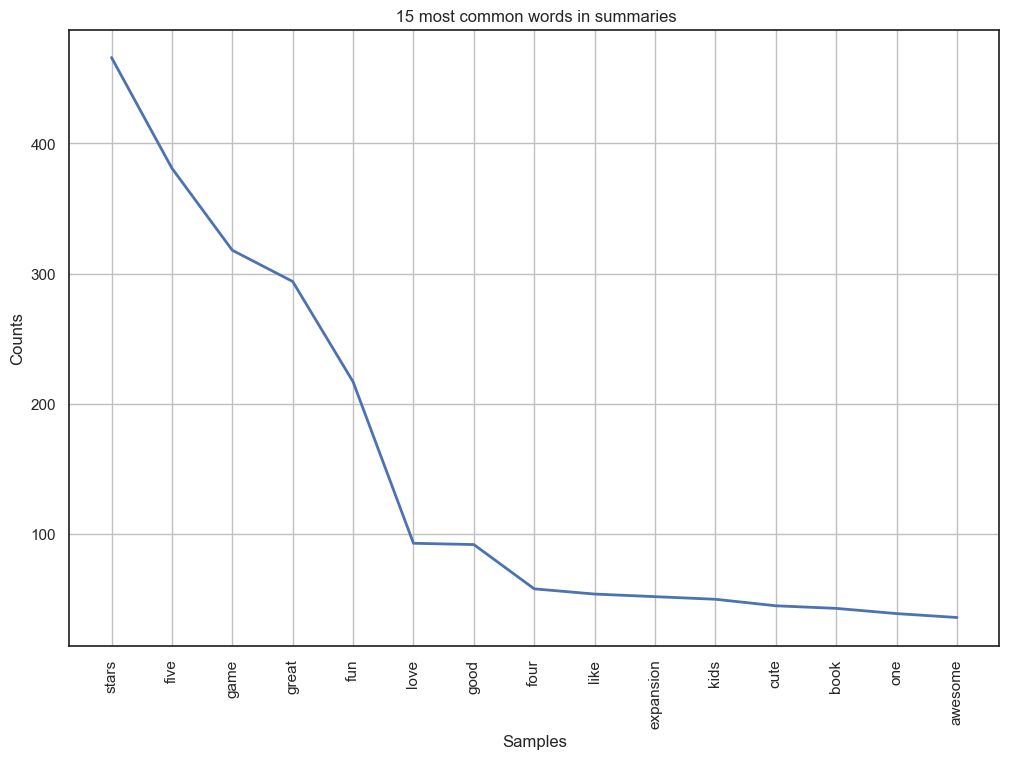

In [73]:
freq_dist_summary.plot(15, title = ' 15 most common words in summaries', cumulative=False)
plt.show()

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [74]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [75]:
# Determine polarity of both columns. 
# Initialise the variables. 
reviews_sentiment_score = []
reviews_polarity = []
summary_sentiment_score = []
summary_polarity = []

for i in range(len(df4)): 
    # Review:
    reviews_score = round(generate_polarity(df4['review'][i]), 3)
    review_polarity = "positive" if reviews_score > 0 else "negative" if reviews_score < 0 else "nuetral"
    reviews_polarity.append(review_polarity)
    reviews_sentiment_score.append(reviews_score)
    
    # Summary:
    summary_score = round(generate_polarity(df4['summary'][i]), 3)
    summ_polarity = "positive" if summary_score > 0 else "negative" if summary_score < 0 else "nuetral"
    summary_polarity.append(summ_polarity)
    summary_sentiment_score.append(summary_score)

df4['review_sentiment_score'] = reviews_sentiment_score
df4['review_polarity'] = reviews_polarity
df4['summary_sentiment_score'] =summary_sentiment_score
df4['summary_polarity'] = summary_polarity

# View the output
df4

,review,summary,review_words,summary_words,review_sentiment_score,review_polarity,summary_sentiment_score,summary_polarity
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...,"[when, it, comes, to, a, dm, s, screen, the, s...","[the, fact, that, 50, of, this, space, is, was...",-0.036,negative,0.150,positive
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, master, s, scree...",0.033,positive,-0.800,negative
2,nice art nice printing why two panels are f...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.115,positive,0.000,nuetral
3,amazing buy bought it as a gift for our new d...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.579,positive,0.000,nuetral
4,as my review of gf9 s previous screens these w...,money trap,"[as, my, review, of, gf9, s, previous, screens...","[money, trap]",-0.317,negative,0.000,nuetral
...,...,...,...,...,...,...,...,...
1968,the perfect word game for mixed ages with mom...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w...",0.169,positive,0.200,positive
1969,great game did not think i would like it whe...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]",0.158,positive,0.317,positive
1970,great game for all \nkeeps the mind ni...,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]",0.200,positive,0.200,positive
1971,fun game,four stars,"[fun, game]","[four, stars]",-0.050,negative,0.000,nuetral


In [76]:
df4['review_polarity'].value_counts()

positive    1590
negative     301
nuetral       82
Name: review_polarity, dtype: int64

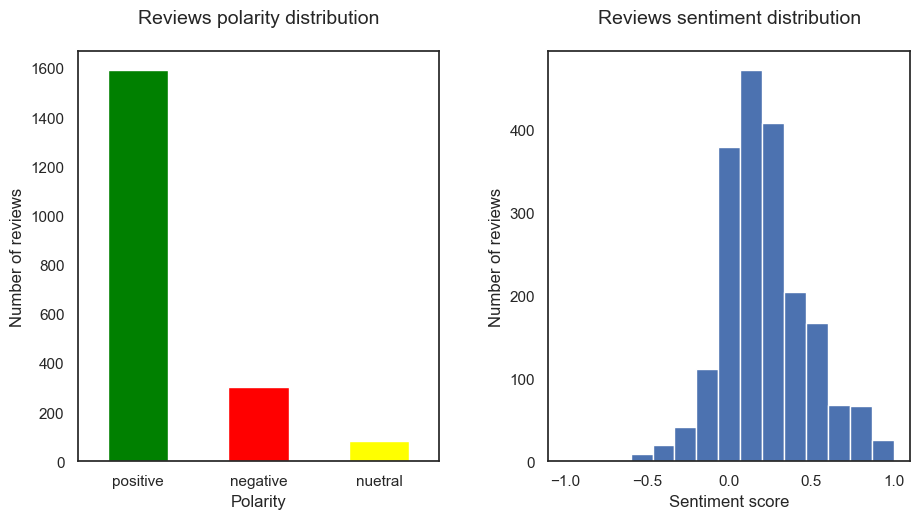

In [77]:
# Review: Create a histogram plot with bins = 15.
# Histogram(or bar plot) of polarity
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
df4['review_polarity'].value_counts().plot(kind='bar', color=['green', 'red', 'yellow'])
plt.title('Reviews polarity distribution', fontsize=14, pad =20)
plt.xlabel('Polarity')
plt.ylabel('Number of reviews')
plt.xticks(rotation=0)

# Histogram of sentiment score
plt.subplot(1,2,2)
plt.hist(df4['review_sentiment_score'], bins=15)
plt.title('Reviews sentiment distribution', fontsize=14, pad =20)
plt.xlabel('Sentiment score')
plt.ylabel('Number of reviews')

plt.tight_layout(pad=3) # Adjust layout to prevent overlapping titles
plt.show()

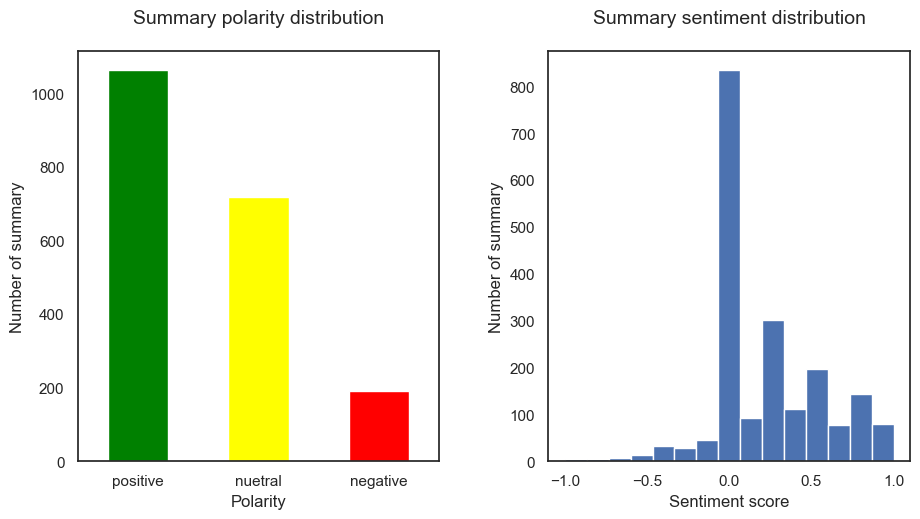

In [78]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
df4['summary_polarity'].value_counts().plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Summary polarity distribution', fontsize=14, pad =20)
plt.xlabel('Polarity')
plt.ylabel('Number of summary')
plt.xticks(rotation=0)

# Histogram of sentiment score
plt.subplot(1,2,2)
plt.hist(df4['summary_sentiment_score'], bins=15)
plt.title('Summary sentiment distribution', fontsize=14, pad =20)
plt.xlabel('Sentiment score')
plt.ylabel('Number of summary')

plt.tight_layout(pad=3) 
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [79]:
# Top 20 negative reviews.
top_20_neg_reviews = (df4[['review', 'review_sentiment_score']][df4['review_polarity'] == 'negative']).\
sort_values(by='review_sentiment_score', ascending=True)[:20]

# View output.
# Configure Pandas to display the entire text content
pd.set_option('display.max_colwidth', None)
top_20_neg_reviews

,review,review_sentiment_score
208,booo unles you are patient know how to measure i didn t have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000
182,incomplete kit very disappointing,-0.780
522,used with anger management group and they like it \ngave them opportunity to share events in their life with\nthe usage of the cues on the cards,-0.700
1782,i m sorry i just find this product to be boring and to be frank juvenile,-0.583
363,one of my staff will be using this game soon so i don t know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550
227,this was a gift for my daughter i found it difficult to use,-0.500
117,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500
1507,expensive for what you get,-0.500
290,instructions are complicated to follow,-0.500
301,difficult,-0.500


In [80]:
# Doing a human check through the top-20 negetive reviews, accuracy is 16 out of 20. (80%). 
# Two summary identified as nuetral and two reviews had more positive tone than negative.

In [81]:
# Top 20 negative summaries.
top_20_neg_summaries = (df4[['summary', 'summary_sentiment_score']][df4['summary_polarity'] == 'negative']).\
sort_values(by='summary_sentiment_score', ascending=True)[:20]

# View output.
# Configure Pandas to display the entire text content
pd.set_option('display.max_colwidth', None)
top_20_neg_summaries

,summary,summary_sentiment_score
21,the worst value i ve ever seen,-1.000
822,boring,-1.000
208,boring unless you are a craft person which i am,-1.000
1152,before this i hated running any rpg campaign dealing with towns because it,-0.900
1,another worthless dungeon master s screen from galeforce9,-0.800
625,disappointed,-0.750
787,disappointed,-0.750
1600,disappointed,-0.750
144,disappointed,-0.750
878,too bad this is not what i was expecting,-0.700


In [82]:
# Doing a human check through the top-20 negetive summary, accuracy is 19 out of 20. (95%). 
# One summary identified as nuetral than negative.

In [83]:
# Top 20 positive reviews.
top_20_pos_reviews = (df4[['review', 'review_sentiment_score']][df4['review_polarity'] == 'positive']).\
sort_values(by='review_sentiment_score', ascending=False)[:20]

# View output.
pd.set_option('display.max_colwidth', None)
top_20_pos_reviews

,review,review_sentiment_score
784,perfect,1.0
615,wonderful for my grandson to learn the resurrection story,1.0
1941,perfect for tutoring my grandson in spelling,1.0
926,awesome,1.0
491,excellent activity for teaching self management skills,1.0
1385,one of the best board games i played in along time,1.0
1163,awesome addition to my rpg gm system,1.0
1693,awesome toy,1.0
194,awesome gift,1.0
585,wonderful product,1.0


In [84]:
# Doing a human check through the top-20 positive reviews, accuracy is 20 out of 20. (100%)

In [85]:
# Top 20 positive summaries.
top_20_pos_summaries = (df4[['summary', 'summary_sentiment_score']][df4['summary_polarity'] == 'positive']).\
sort_values(by='summary_sentiment_score', ascending=False)[:20]

# View output.
pd.set_option('display.max_colwidth', None)
top_20_pos_summaries

,summary,summary_sentiment_score
645,all f the mudpuppy toys are wonderful,1.0
470,excellent,1.0
725,the best feedback i can have,1.0
1491,wonderful gift,1.0
718,excellent puzzle,1.0
656,not the best quality,1.0
651,awesome puzzle,1.0
1729,best gift i ever gave the kids,1.0
641,wonderful,1.0
593,best easter teaching tool,1.0


In [86]:
# Doing a human cross-check through the top-20 positive summary, accuracy is 19 out of 20. (%95)

## Part 3: Insights and observations

***Observation:***
    
Polarity and sentiment scores were computed for both columns and visualized using bar plots and histograms. To validate the analysis, 20 negative and 20 positive reviews/summaries were cross-checked, revealing slight discrepancies in scores. Interestingly, the "summary" column exhibited higher accuracy compared to the "review" column.

***Technical recommendations:***

•   Consider filtering observations where the polarity of reviews and summaries conflict, allowing for a more in-depth analysis.

•   Exploring the potential benefits of calculating the mean or weighted average of sentiment scores from both columns to enhance accuracy is advisable.

•   Furthermore, conducting granular sentiment analysis based on specific game types is valuable due to their distinct characteristics and applications.

***Recommendations to marketing team:***
    
Based on the results showing predominantly positive sentiments with noticeable neutral ones and smaller number of negatives:

•   Leverage positive sentiments to reinforce the positive aspects in marketing campaigns.

•   Engage with customers who express neutral  and negative sentiments to gather feedback and better understand their needs and expectations.

•   Compare sentiments with competitors for advantages and areas to differentiate in your products/services. 

•   Establish a system for continuous sentiment monitoring which can help in adapting marketing strategies as sentiments evolve.
